# Illinois Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# SQLAlchemy
from sqlalchemy import create_engine

# Path to sqlite
database_path = "../Xi/states_HPI_disa_weather_final2.csv"

# Read database_path and store into Pandas data frame
final_data = pd.read_csv(database_path)

final_data

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Total (C),Total (F),Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,180.0,713.0,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,175.0,707.0,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,162.0,680.0,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,171.0,693.0,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,173.0,703.0,58.58,14.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CA,1995,NaN,0.079,0.079,0.554,31493525,61846,329.986000,175.0,704.0,58.67,14.58
83,CA,1994,NaN,0.084,0.086,0.555,31317179,60464,332.747455,168.0,693.0,57.75,14.00
84,CA,1993,NaN,0.073,0.095,0.560,31147208,59529,338.246727,168.0,690.0,57.50,14.00
85,CA,1992,NaN,0.084,0.093,0.553,30875920,62517,350.106852,176.0,709.0,59.08,14.67


In [3]:
#drop nan's so I can create the plots

df = final_data.dropna()
df

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Total (C),Total (F),Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,180.0,713.0,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,175.0,707.0,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,162.0,680.0,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,171.0,693.0,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,173.0,703.0,58.58,14.42
5,CA,2001,81.0,0.070,0.054,0.582,34479458,68413,486.225714,175.0,705.0,58.75,14.58
6,CA,2002,124.0,0.065,0.067,0.577,34871843,67600,525.130526,174.0,703.0,58.58,14.50
7,CA,2003,130.0,0.058,0.068,0.589,35253159,68695,564.373621,178.0,712.0,59.33,14.83
8,CA,2004,63.0,0.058,0.062,0.597,35574576,66782,666.211724,175.0,703.0,58.58,14.58
9,CA,2005,35.0,0.059,0.054,0.597,35827943,67918,824.612931,174.0,699.0,58.25,14.50


In [4]:
#create a new IL dataset to easily reference 
IL_df = df["State"] == 'IL'

IL_filter = df[IL_df]

IL_filter

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Total (C),Total (F),Average Temperature (F),Average Temperature (C)
44,IL,1991,36.0,0.093,0.073,0.630,11535973,31884,146.882787,144.0,645.0,53.75,12.00
45,IL,1992,23.0,0.084,0.079,0.624,11635197,31551,144.089571,133.0,625.0,52.08,11.08
46,IL,1993,12.0,0.073,0.074,0.618,11725984,32857,141.668171,126.0,611.0,50.92,10.50
47,IL,1994,17.0,0.084,0.058,0.642,11804986,35081,149.735000,133.0,625.0,52.08,11.08
48,IL,1995,58.0,0.079,0.052,0.664,11884935,38071,159.270122,131.0,620.0,51.67,10.92
49,IL,1996,71.0,0.078,0.053,0.682,11953003,39554,164.556386,122.0,603.0,50.25,10.17
50,IL,1997,35.0,0.076,0.048,0.681,12011509,41283,170.086627,126.0,616.0,51.33,10.50
51,IL,1998,105.0,0.069,0.044,0.680,12069774,43178,170.318864,153.0,664.0,55.33,12.75
52,IL,1999,76.0,0.074,0.044,0.671,12128370,46330,175.569318,143.0,645.0,53.75,11.92
53,IL,2000,58.0,0.081,0.043,0.679,12434161,46064,182.080114,136.0,628.0,52.33,11.33


# Average Temperature vs. HPI

The correlation between both factors is 0.27


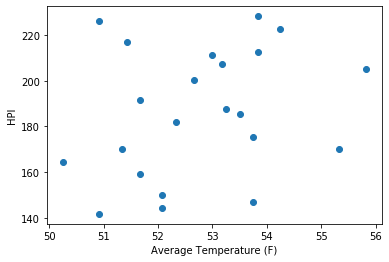

In [13]:
IL_temp = IL_filter.iloc[:,11]
IL_HPI = IL_filter.iloc[:,8]
correlation = st.pearsonr(IL_temp, IL_HPI)
plt.scatter(IL_temp, IL_HPI)
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_temp_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.07447279685403349


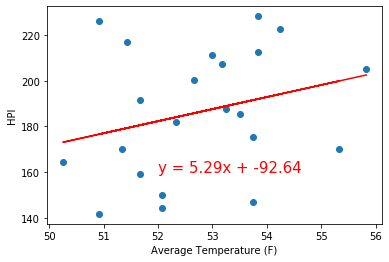

In [14]:
# Add the linear regression equation and line to plot

x_values = IL_temp
y_values = IL_HPI
correlation = st.pearsonr(IL_temp, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52,160),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_temp_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Temperature vs. Home Owner Rate

The correlation between both factors is 0.16


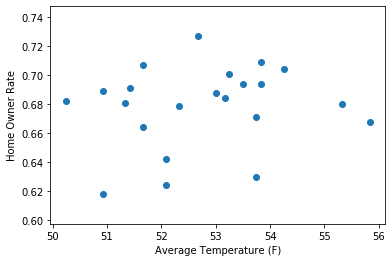

In [15]:
#correlation between Temperature vs Home Owner Rate

IL_HomeOwnerRate = IL_filter.iloc[:,5]
correlation = st.pearsonr(IL_temp, IL_HomeOwnerRate)
plt.scatter(IL_temp, IL_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_temp_hor.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.024784364742195596


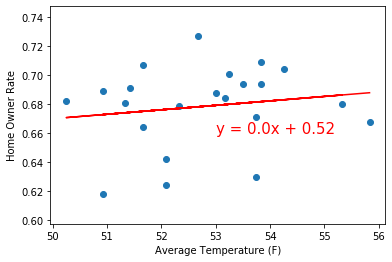

In [16]:
# Add the linear regression equation and line to plot

x_values = IL_temp
y_values = IL_HomeOwnerRate
correlation = st.pearsonr(IL_temp, IL_HomeOwnerRate)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,.66),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_temp_hor_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Temperature vs. Interest Rate

The correlation between both factors is -0.3


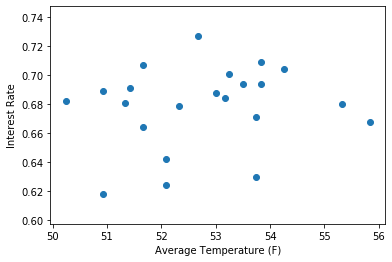

In [17]:
#correlation between Temperature vs Interest Rate
IL_Interest = IL_filter.iloc[:,3]
correlation = st.pearsonr(IL_temp, IL_Interest)
plt.scatter(IL_temp, IL_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_temp_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.09238335979849847


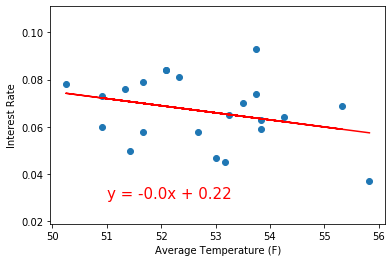

In [18]:
# Add the linear regression equation and line to plot

x_values = IL_temp
y_values = IL_Interest
correlation = st.pearsonr(IL_temp, IL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(51,.03),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_temp_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# HPI vs Interest Rate

The correlation between both factors is -0.78


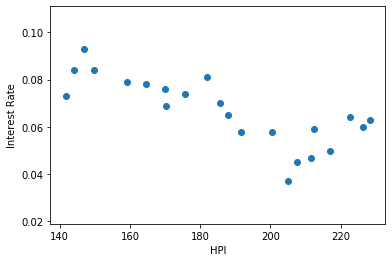

In [19]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(IL_HPI, IL_Interest)
plt.scatter(IL_HPI, IL_Interest)
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_hpi_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.6015761835254642


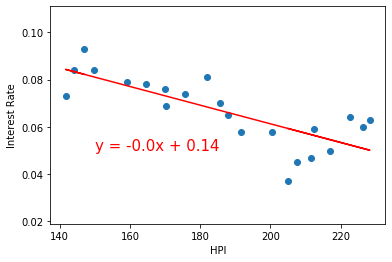

In [20]:
# Add the linear regression equation and line to plot
x_values = IL_HPI
y_values = IL_Interest
correlation = st.pearsonr(IL_HPI, IL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,.05),fontsize=15,color="red")
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_hpi_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Disaster vs. Interest Rate

The correlation between both factors is -0.23


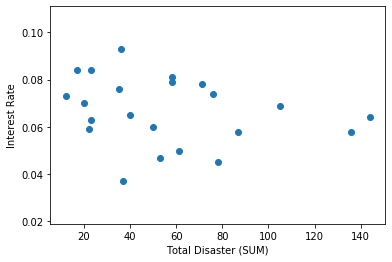

In [21]:
#correlation between Temperature vs Interest Rate
IL_total_disaster = IL_filter.iloc[:,2]
correlation = st.pearsonr(IL_total_disaster, IL_Interest)
plt.scatter(IL_total_disaster, IL_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_disaster_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.08388020628694857


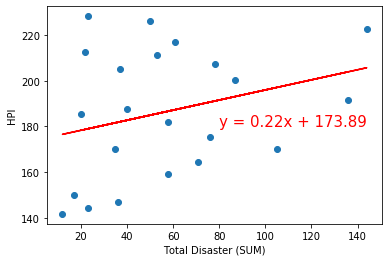

In [22]:
# Add the linear regression equation and line to plot
x_values = IL_total_disaster
y_values = IL_HPI
correlation = st.pearsonr(IL_total_disaster, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,180),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_disaster_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Disaster vs. HPI

The correlation between both factors is 0.29


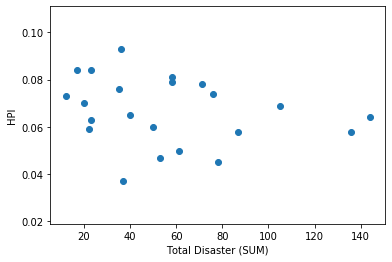

In [23]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(IL_total_disaster, IL_HPI)
plt.scatter(IL_total_disaster, IL_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_disaster_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.08388020628694857


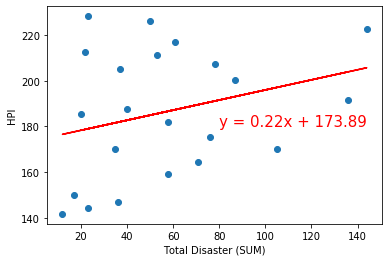

In [24]:
# Add the linear regression equation and line to plot
x_values = IL_total_disaster
y_values = IL_HPI
correlation = st.pearsonr(IL_total_disaster, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,180),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_disaster_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Uemployment vs. HPI

The correlation between both factors is 0.18


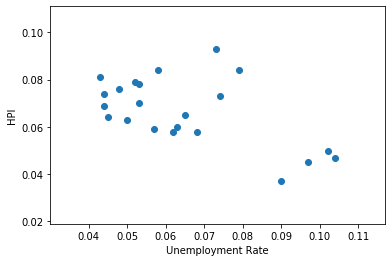

In [25]:
#correlation between Temperature vs Interest Rate
IL_unemployment = IL_filter.iloc[:,4]
correlation = st.pearsonr(IL_unemployment, IL_HPI)
plt.scatter(IL_unemployment, IL_Interest)
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_unemployment_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.03411111791218251


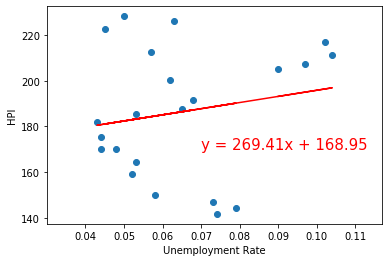

In [26]:
# Add the linear regression equation and line to plot
x_values = IL_unemployment
y_values = IL_HPI
correlation = st.pearsonr(IL_unemployment, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.07,170),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_disaster_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Medium Income vs. HPI 

The correlation between both factors is 0.95


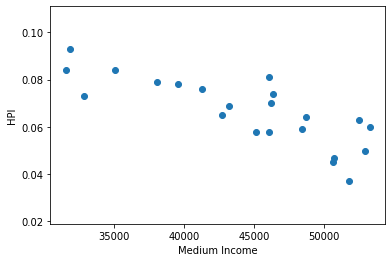

In [27]:
#correlation between Temperature vs Interest Rate
IL_medium_income = IL_filter.iloc[:,7]
correlation = st.pearsonr(IL_medium_income, IL_HPI)
plt.scatter(IL_medium_income, IL_Interest)
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('IL_income_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.8981035917349928


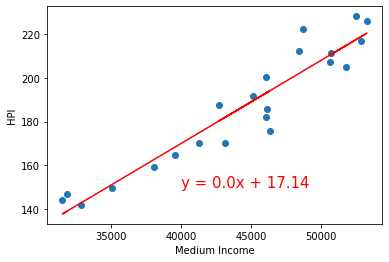

In [28]:
# Add the linear regression equation and line to plot
x_values = IL_medium_income
y_values = IL_HPI
correlation = st.pearsonr(IL_medium_income, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000,150),fontsize=15,color="red")
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('IL_income_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Florida Analysis

In [29]:
#create a new IL dataset to easily reference 
FL_df = df["State"] == 'FL'

FL_filter = df[FL_df]

FL_filter

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Total (C),Total (F),Average Temperature (F),Average Temperature (C)
24,FL,1996,34.0,0.078,0.052,0.671,14426911,49876,186.620192,254.0,843.0,70.25,21.17
25,FL,1998,113.0,0.069,0.043,0.669,14908230,54878,193.858214,270.0,875.0,72.92,22.50
26,FL,1999,59.0,0.074,0.039,0.676,15111244,55153,201.104643,261.0,859.0,71.58,21.75
27,FL,2000,52.0,0.081,0.037,0.684,16047515,57846,213.664821,258.0,852.0,71.00,21.50
28,FL,2001,51.0,0.070,0.047,0.692,16356966,52720,225.201864,259.0,857.0,71.42,21.58
29,FL,2002,35.0,0.065,0.056,0.687,16689370,54186,239.985500,262.0,864.0,72.00,21.83
30,FL,2004,156.0,0.058,0.046,0.722,17415318,54996,289.774355,260.0,856.0,71.33,21.67
31,FL,2005,134.0,0.059,0.037,0.724,17842038,56416,362.063387,257.0,854.0,71.17,21.42
32,FL,2006,56.0,0.064,0.032,0.724,18166990,58059,412.042381,263.0,861.0,71.75,21.92
33,FL,2007,16.0,0.063,0.040,0.718,18367842,56604,397.869844,266.0,866.0,72.17,22.17


# Average Temperature vs HPI

The correlation between both factors is 0.07


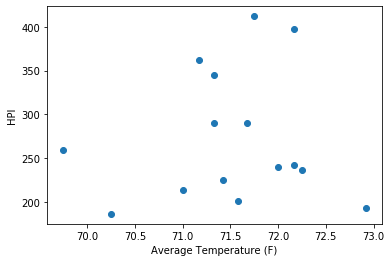

In [30]:
FL_temp = FL_filter.iloc[:,11]
FL_HPI = FL_filter.iloc[:,8]
correlation = st.pearsonr(FL_temp, FL_HPI)
plt.scatter(FL_temp, FL_HPI)
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_temp_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.005069175593408111


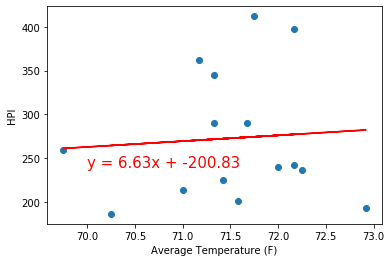

In [31]:
# Add the linear regression equation and line to plot

x_values = FL_temp
y_values = FL_HPI
correlation = st.pearsonr(FL_temp, FL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,240),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_temp_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Temperature vs. Home Owner Rate

The correlation between both factors is -0.08


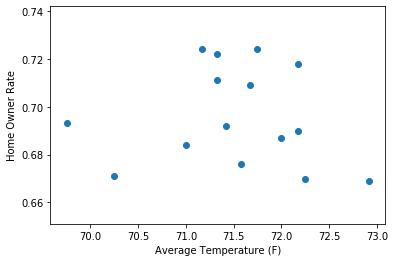

In [32]:
#correlation between Temperature vs Home Owner Rate

FL_HomeOwnerRate = FL_filter.iloc[:,5]
correlation = st.pearsonr(FL_temp, FL_HomeOwnerRate)
plt.scatter(FL_temp, FL_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_temp_hor.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.00584795673156676


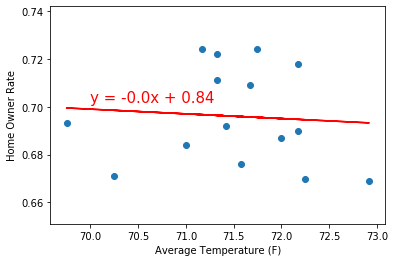

In [33]:
# Add the linear regression equation and line to plot

x_values = FL_temp
y_values = FL_HomeOwnerRate
correlation = st.pearsonr(FL_temp, FL_HomeOwnerRate)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,.702),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_temp_hor_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Temperature vs. Interest Rate

The correlation between both factors is -0.15


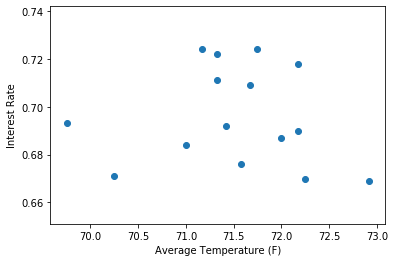

In [34]:
#correlation between Temperature vs Interest Rate
FL_Interest = FL_filter.iloc[:,3]
correlation = st.pearsonr(FL_temp, FL_Interest)
plt.scatter(FL_temp, FL_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_temp_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.021221203807218866


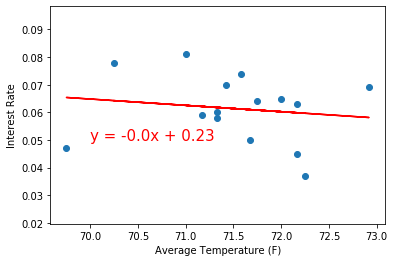

In [35]:
# Add the linear regression equation and line to plot

x_values = FL_temp
y_values = FL_Interest
correlation = st.pearsonr(FL_temp, FL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,.05),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_temp_hor_r.png', dpi=300, bbox_inches='tight')
plt.show()

# HPI vs Interest Rate

The correlation between both factors is -0.24


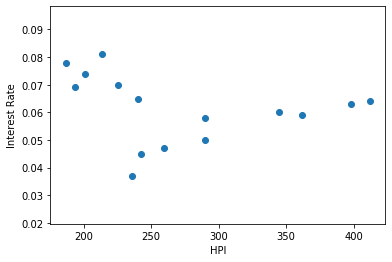

In [36]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(FL_HPI, FL_Interest)
plt.scatter(FL_HPI, FL_Interest)
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_hpi_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.05527497565925462


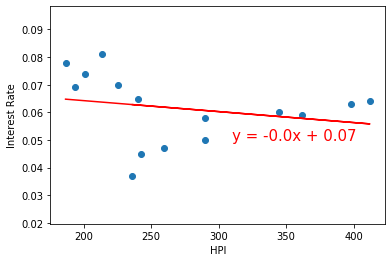

In [37]:
# Add the linear regression equation and line to plot
x_values = FL_HPI
y_values = FL_Interest
correlation = st.pearsonr(FL_HPI, FL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(310,.05),fontsize=15,color="red")
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_hpi_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Disaster vs. Interest Rate

The correlation between both factors is 0.17


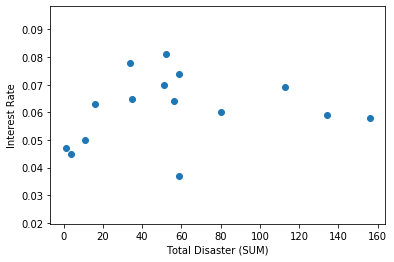

In [38]:
#correlation between Temperature vs Interest Rate
FL_total_disaster = FL_filter.iloc[:,2]
correlation = st.pearsonr(FL_total_disaster, FL_Interest)
plt.scatter(FL_total_disaster, FL_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_disaster_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.02831890961832425


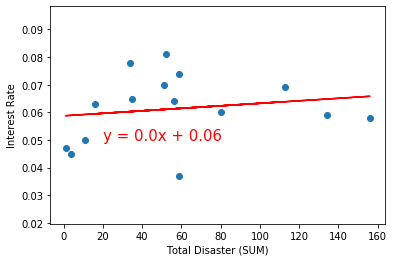

In [42]:
# Add the linear regression equation and line to plot
x_values = FL_total_disaster
y_values = FL_Interest
correlation = st.pearsonr(FL_total_disaster, FL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0.05),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_disaster_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Disaster vs. HPI

The correlation between both factors is 0.11


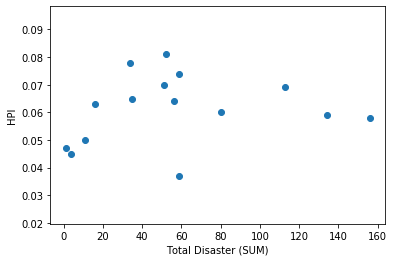

In [43]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(FL_total_disaster, FL_HPI)
plt.scatter(FL_total_disaster, FL_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_disaster_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.011292654533806538


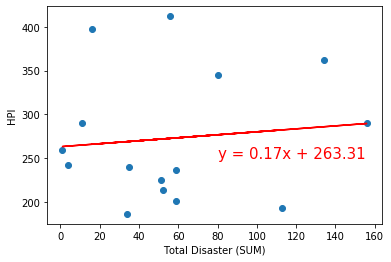

In [44]:
# Add the linear regression equation and line to plot
x_values = FL_total_disaster
y_values = FL_HPI
correlation = st.pearsonr(FL_total_disaster, FL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,250),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_disaster_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Unemployment vs. HPI

The correlation between both factors is -0.17


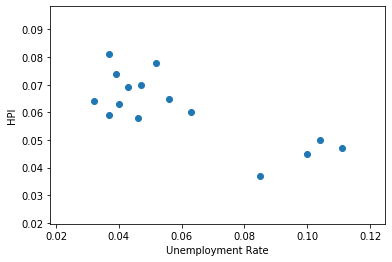

In [45]:
#correlation between Temperature vs Interest Rate
FL_unemployment = FL_filter.iloc[:,4]
correlation = st.pearsonr(FL_unemployment, FL_HPI)
plt.scatter(FL_unemployment, FL_Interest)
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_unemployment_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.030116450252893133


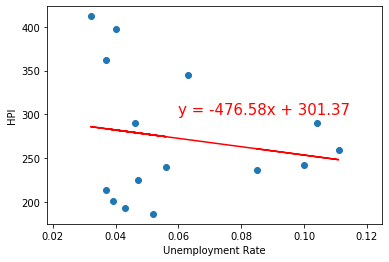

In [46]:
# Add the linear regression equation and line to plot
x_values = FL_unemployment
y_values = FL_HPI
correlation = st.pearsonr(FL_unemployment, FL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.06,300),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_unemployment_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Medium Income vs. HPI 

The correlation between both factors is 0.52


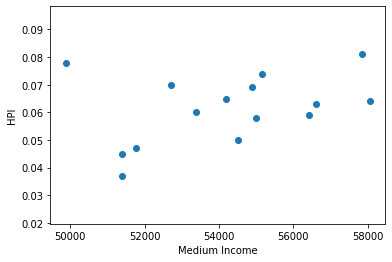

In [47]:
#correlation between Temperature vs Interest Rate
FL_medium_income = FL_filter.iloc[:,7]
correlation = st.pearsonr(FL_medium_income, FL_HPI)
plt.scatter(FL_medium_income, FL_Interest)
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('FL_income_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.270219022464964


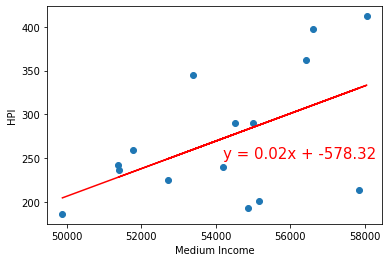

In [48]:
# Add the linear regression equation and line to plot
x_values = FL_medium_income
y_values = FL_HPI
correlation = st.pearsonr(FL_medium_income, FL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(54200,250),fontsize=15,color="red")
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('FL_income_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# California Analysis

In [49]:
#create a new IL dataset to easily reference 
CA_df = df["State"] == 'CA'

CA_filter = df[CA_df]

CA_filter

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Total (C),Total (F),Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,180.0,713.0,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,175.0,707.0,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,162.0,680.0,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,171.0,693.0,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,173.0,703.0,58.58,14.42
5,CA,2001,81.0,0.070,0.054,0.582,34479458,68413,486.225714,175.0,705.0,58.75,14.58
6,CA,2002,124.0,0.065,0.067,0.577,34871843,67600,525.130526,174.0,703.0,58.58,14.50
7,CA,2003,130.0,0.058,0.068,0.589,35253159,68695,564.373621,178.0,712.0,59.33,14.83
8,CA,2004,63.0,0.058,0.062,0.597,35574576,66782,666.211724,175.0,703.0,58.58,14.58
9,CA,2005,35.0,0.059,0.054,0.597,35827943,67918,824.612931,174.0,699.0,58.25,14.50


# Average Temperature vs HPI

The correlation between both factors is 0.11


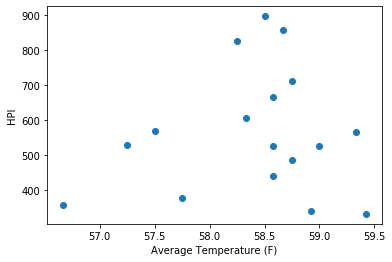

In [50]:
CA_temp = CA_filter.iloc[:,11]
CA_HPI = CA_filter.iloc[:,8]
correlation = st.pearsonr(CA_temp, CA_HPI)
plt.scatter(CA_temp, CA_HPI)
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_temp_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.011750499825983004


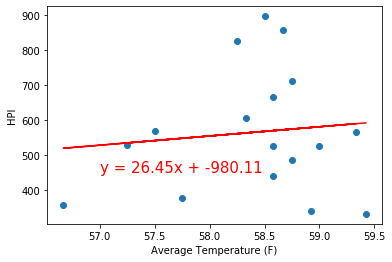

In [51]:
# Add the linear regression equation and line to plot

x_values = CA_temp
y_values = CA_HPI
correlation = st.pearsonr(CA_temp, CA_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(57,450),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_temp_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Temperature vs. Home Owner Rate

The correlation between both factors is 0.21


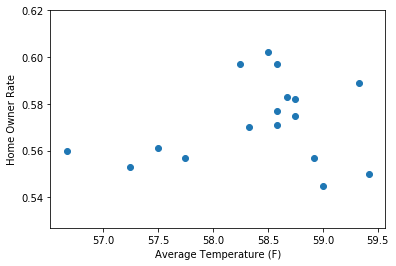

In [52]:
#correlation between Temperature vs Home Owner Rate

CA_HomeOwnerRate = CA_filter.iloc[:,5]
correlation = st.pearsonr(CA_temp, CA_HomeOwnerRate)
plt.scatter(CA_temp, CA_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_temp_hor.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.044969888458163916


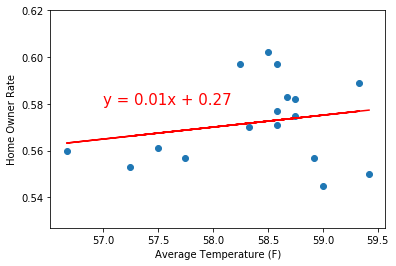

In [53]:
# Add the linear regression equation and line to plot

x_values = CA_temp
y_values = CA_HomeOwnerRate
correlation = st.pearsonr(CA_temp, CA_HomeOwnerRate)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(57,.58),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_temp_hor_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Temperature vs. Interest Rate

The correlation between both factors is 0.18


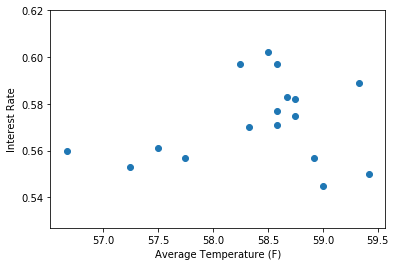

In [54]:
#correlation between Temperature vs Interest Rate
CA_Interest = CA_filter.iloc[:,3]
correlation = st.pearsonr(CA_temp, CA_Interest)
plt.scatter(CA_temp, CA_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_temp_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.030648213616366094


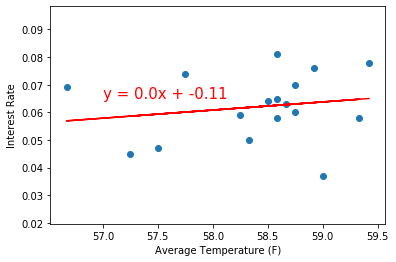

In [55]:
# Add the linear regression equation and line to plot

x_values = CA_temp
y_values = CA_Interest
correlation = st.pearsonr(CA_temp, CA_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(57,.065),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_temp_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# HPI vs Interest Rate

The correlation between both factors is -0.38


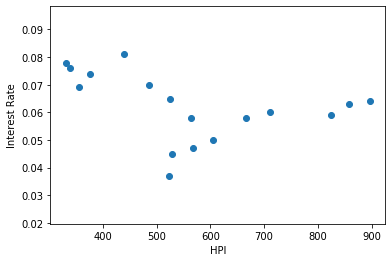

In [56]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(CA_HPI, CA_Interest)
plt.scatter(CA_HPI, CA_Interest)
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_hpi_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.14095737899579622


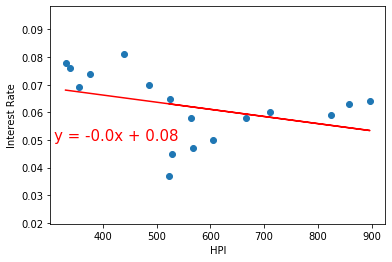

In [57]:
# Add the linear regression equation and line to plot
x_values = CA_HPI
y_values = CA_Interest
correlation = st.pearsonr(CA_HPI, CA_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(310,.05),fontsize=15,color="red")
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_hpi_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Disaster vs. Interest Rate

The correlation between both factors is 0.09


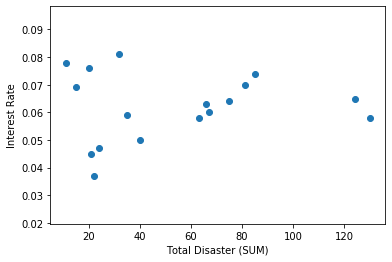

In [58]:
#correlation between Temperature vs Interest Rate
CA_total_disaster = CA_filter.iloc[:,2]
correlation = st.pearsonr(CA_total_disaster, CA_Interest)
plt.scatter(CA_total_disaster, CA_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_disaster_ir.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.07176784230252065


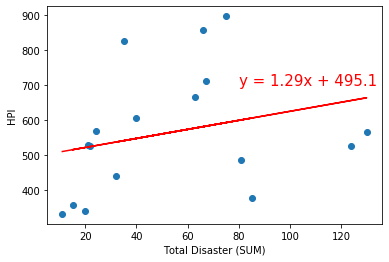

In [59]:
# Add the linear regression equation and line to plot
x_values = CA_total_disaster
y_values = CA_HPI
correlation = st.pearsonr(CA_total_disaster, CA_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,700),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_hpi_ir_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Disaster vs. HPI

The correlation between both factors is 0.27


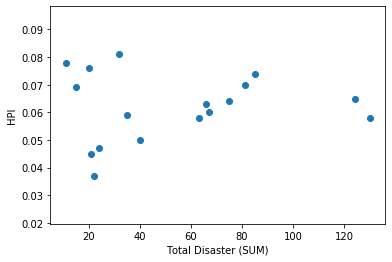

In [60]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(CA_total_disaster, CA_HPI)
plt.scatter(CA_total_disaster, CA_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_disaster_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.07176784230252065


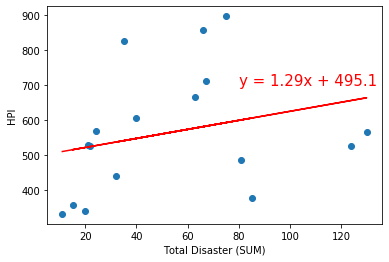

In [61]:
# Add the linear regression equation and line to plot
x_values = CA_total_disaster
y_values = CA_HPI
correlation = st.pearsonr(CA_total_disaster, CA_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,700),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_disaster_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Uemployment vs. HPI

The correlation between both factors is -0.1


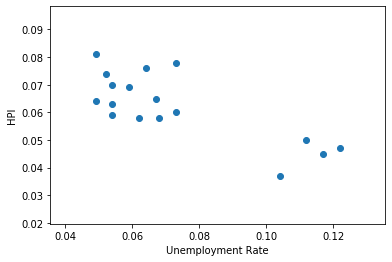

In [62]:
#correlation between Temperature vs Interest Rate
CA_unemployment = CA_filter.iloc[:,4]
correlation = st.pearsonr(CA_unemployment, CA_HPI)
plt.scatter(CA_unemployment, CA_Interest)
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_unemployment_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.010153861301277555


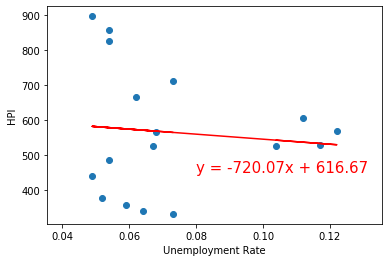

In [63]:
# Add the linear regression equation and line to plot
x_values = CA_unemployment
y_values = CA_HPI
correlation = st.pearsonr(CA_unemployment, CA_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.08,450),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_unemployment_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()

# Medium Income vs. HPI 

The correlation between both factors is 0.53


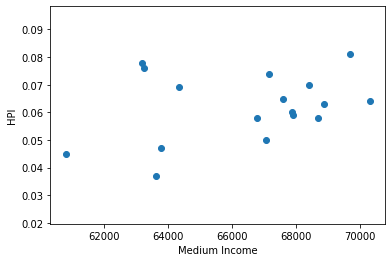

In [64]:
#correlation between Temperature vs Interest Rate
CA_medium_income = CA_filter.iloc[:,7]
correlation = st.pearsonr(CA_medium_income, CA_HPI)
plt.scatter(CA_medium_income, CA_Interest)
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('CA_income_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

The r-squared is: 0.284229307485118


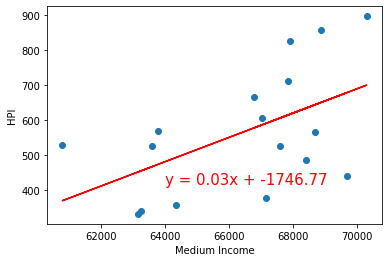

In [65]:
# Add the linear regression equation and line to plot
x_values = CA_medium_income
y_values = CA_HPI
correlation = st.pearsonr(CA_medium_income, CA_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(64000,415),fontsize=15,color="red")
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('CA_income_hpi_r.png', dpi=300, bbox_inches='tight')
plt.show()